In [89]:
import matplotlib.pyplot as plt
import numpy as np
def R2RAS(R = lambda z : 1 + z + 0.5*z*z,cmap='Blues',label='R',bounds = ((-4,4),(-4,4))):
    fig, ax = plt.subplots(figsize=(8,8))
    nx = 100
    ny = 160
    x = np.linspace(bounds[0][0],bounds[0][1],nx)
    y = np.linspace(bounds[1][0],bounds[1][1],ny)
    xg,yg = np.meshgrid(x,y)

    z = xg + 1j*yg 
    f = R(z)
    absf = (f.real)**2 + (f.imag)**2

    plt.rcParams.update({'font.size': 22})
    
    # ax.contourf(xg,yg,absf,np.linspace(0,1,.05), cmap=cmap, alpha=0.1)
    con = ax.contour(xg,yg,absf,np.linspace(0,1,100), cmap=cmap)  
    ax.plot([], [], color=cmap[:-1], label=label)
    plt.title("RAS")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.colorbar(con, label=label, orientation='vertical')
    ax.set_aspect(1)
    plt.grid(color='k', linestyle='--', linewidth=0.5)
    # plt.show()

DIRK2 R(z) symbolic computation

In [64]:
import sympy as sp
import numpy as np


gamma = sp.symbols('gamma')
# Define the matrix A and vector b
A = sp.Matrix([[gamma, 0],
                [1-gamma, gamma]])

b = sp.Matrix([1-gamma, gamma])

# Define the number of elements in b
s = len(b)
z = sp.symbols('z')

R_DIRK2 = sp.simplify((sp.ones(1,1) + z*b.T * (sp.eye(s) - z*A).inv() * sp.ones(s, 1))[0])

R_DIRK2

(-2*gamma*z + z + 1)/(gamma**2*z**2 - 2*gamma*z + 1)

In [7]:
b.T *(sp.eye(s) - z*A).inv() * sp.ones(s, 1)

Matrix([[gamma*(-gamma*z + z)/(gamma**2*z**2 - 2*gamma*z + 1) - gamma/(gamma*z - 1) - (1 - gamma)/(gamma*z - 1)]])

In [9]:
R_DIRK2.subs(gamma,1-1/sp.sqrt(2))

(-2*z*(1 - sqrt(2)/2) + z + 1)/(z**2*(1 - sqrt(2)/2)**2 - 2*z*(1 - sqrt(2)/2) + 1)

In [10]:
sp.simplify(R_DIRK2.subs(gamma,1-1/sp.sqrt(2)))

4*(-z*(2 - sqrt(2)) + z + 1)/(z**2*(2 - sqrt(2))**2 - 4*z*(2 - sqrt(2)) + 4)

In [4]:
(sp.eye(s) - z*A).inv()

Matrix([
[                              -1/(gamma*z - 1),                0],
[(-gamma*z + z)/(gamma**2*z**2 - 2*gamma*z + 1), -1/(gamma*z - 1)]])

In [90]:
from ipywidgets import interact

def plot(gam):
    Rgam = sp.lambdify((z,),R_DIRK2.subs(gamma,gam))
    R2RAS(Rgam,cmap='Blues',label='R')

interact(plot,gam=(-1.0,10.0,0.01))

interactive(children=(FloatSlider(value=4.5, description='gam', max=10.0, min=-1.0, step=0.01), Output()), _do…

<function __main__.plot(gam)>

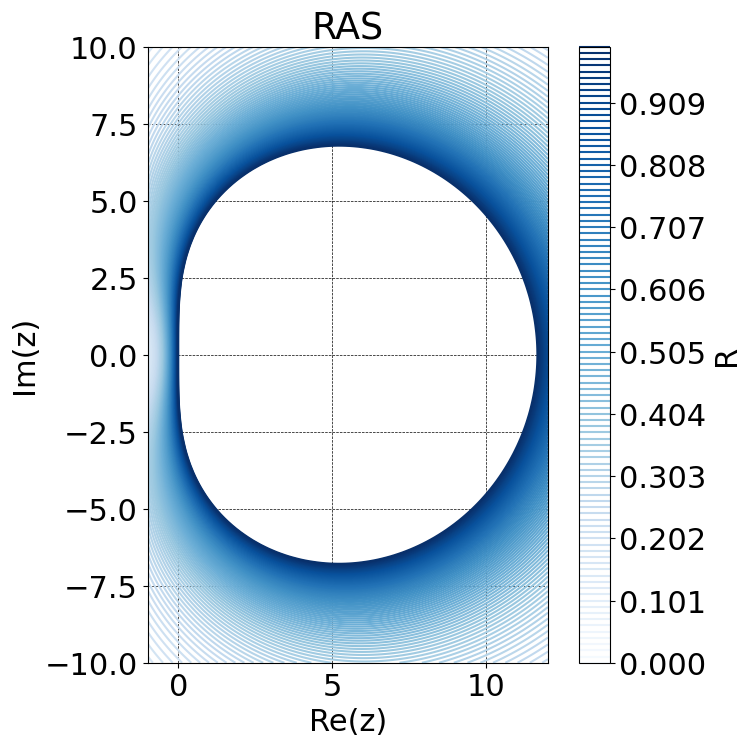

In [100]:
Rgam = sp.lambdify((z,),R_DIRK2.subs(gamma,1-(np.sqrt(2)/2)))

# R2RAS(Rgam,cmap='Blues',label='R',)
R2RAS(Rgam,cmap='Blues',label='R',bounds=((-1,12),(-10,10)))

DIRKfam R(z) symbolic computation

In [95]:
import sympy as sp
import numpy as np


gamma = sp.symbols('gamma')
# Define the matrix A and vector b
A = sp.Matrix([[gamma, 0],
                [1-2*gamma, gamma]])

b = sp.Matrix([1/2, 1/2])

# Define the number of elements in b
s = len(b)
z = sp.symbols('z')

R_DIRKfam = sp.simplify((sp.ones(1,1) + z*b.T * (sp.eye(s) - z*A).inv() * sp.ones(s, 1))[0])

R_DIRKfam

(1.0*gamma**2*z**2 - 2.0*gamma*z**2 - 2.0*gamma*z + 0.5*z**2 + 1.0*z + 1.0)/(1.0*gamma**2*z**2 - 2.0*gamma*z + 1.0)

In [31]:
(sp.eye(s) - z*A).inv()

Matrix([
[                                -1/(gamma*z - 1),                0],
[(-2*gamma*z + z)/(gamma**2*z**2 - 2*gamma*z + 1), -1/(gamma*z - 1)]])

In [44]:
sp.solve(sp.limit(R_DIRKfam,z,np.inf),gamma)

[1 - sqrt(2)/2, sqrt(2)/2 + 1]

In [65]:
sp.simplify(R_DIRKfam.subs(gamma,1 - sp.sqrt(2)/2))

1.0*(-sqrt(2)*z + z - 1)/(-1.5*z**2 + 1.0*sqrt(2)*z**2 - 1.0*sqrt(2)*z + 2.0*z - 1.0)

In [45]:
print(sp.latex(sp.simplify(R_DIRKfam)))

\frac{1.0 \gamma^{2} z^{2} - 2.0 \gamma z^{2} - 2.0 \gamma z + 0.5 z^{2} + 1.0 z + 1.0}{1.0 \gamma^{2} z^{2} - 2.0 \gamma z + 1.0}


In [98]:
1+np.sqrt(2)/2

np.float64(1.7071067811865475)

In [96]:
from ipywidgets import interact

def plot(gam):
    Rgam = sp.lambdify((z,),R_DIRKfam.subs(gamma,gam))
    
    R2RAS(Rgam,cmap='Blues',label='R')

interact(plot,gam=(-10.0,10.0,0.01))

interactive(children=(FloatSlider(value=0.0, description='gam', max=10.0, min=-10.0, step=0.01), Output()), _d…

<function __main__.plot(gam)>

In [78]:
1-(np.sqrt(2)/2)

np.float64(0.2928932188134524)

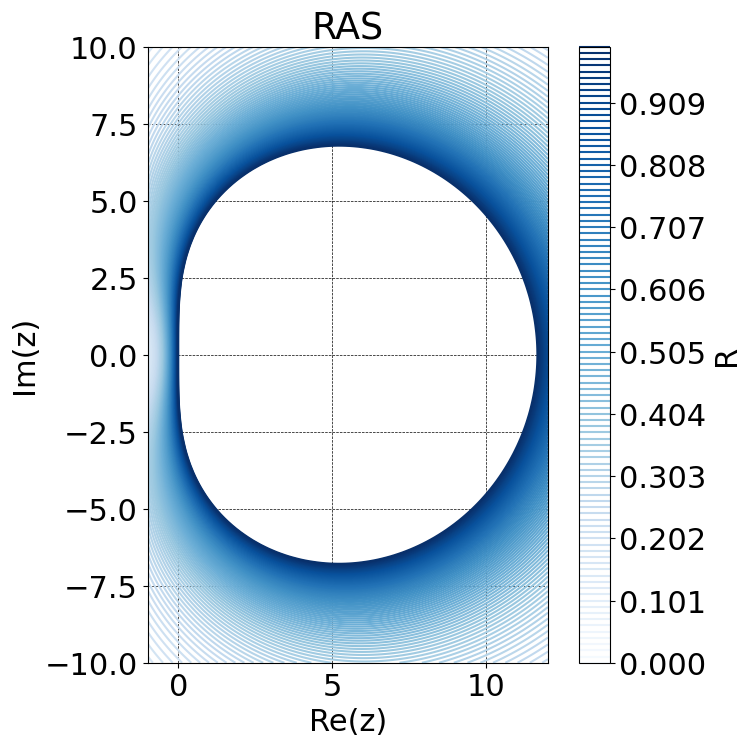

In [97]:
Rgam = sp.lambdify((z,),R_DIRKfam.subs(gamma,1-np.sqrt(2)/2))

R2RAS(Rgam,cmap='Blues',label='R',bounds=((-1,12),(-10,10)))

DIRK2 symbolic order computation

In [ ]:
import sympy as sp
import numpy as np

gamma = sp.symbols('gamma')
# Define the matrix A and vector b
A = sp.Matrix([[gamma, 0],
                [1-gamma, gamma]])

b = sp.Matrix([1-gamma, gamma])

# Define the number of elements in b
s = len(b)

# Compute the sum of b
ord1 = sum(b[l] for l in range(s))

# Compute the second sum
ord2 = 2*sum(b[l]*sum(A[l, q] for q in range(A.shape[1]) )for l in range(s) )

ord3 = 3*sum(b[j]*A[j,k]*A[j,l] for j in range(s) for k in range(s) for l in range(s))
ord3alt = 6*sum(b[j]*A[j,k]*A[k,l] for j in range(s) for k in range(s) for l in range(s))

# Display the results
print("Sum of b:", ord1)
print("Second sum:", ord2)
print("Third sum:", ord3)
print("Third sum:", ord3alt)

solutions_ord1 = sp.solve(ord1 - 1, gamma)
solutions_ord2 = sp.solve(ord2 - 1, gamma)
solutions_ord3 = sp.solve(ord3 - 1, gamma)
solutions_ord3alt = sp.solve(ord3alt - 1, gamma)

# Display the results
print("Solutions for ord1 = 1:", solutions_ord1)
print("Solutions for ord2 = 1:", solutions_ord2)
print("Solutions for ord3 = 1:", solutions_ord3)
print("Solutions for ord3alt = 1:", solutions_ord3alt)


Sum of b: 1
Second sum: 2*gamma*(1 - gamma) + 2*gamma
Third sum: 3*gamma**3 + 9*gamma**2*(1 - gamma) + 3*gamma*(1 - gamma)**2
Third sum: 6*gamma**3 + 18*gamma**2*(1 - gamma)
Solutions for ord1 = 1: []
Solutions for ord2 = 1: [1 - sqrt(2)/2, sqrt(2)/2 + 1]
Solutions for ord3 = 1: [1/3 + (-1/2 - sqrt(3)*I/2)*(1/27 + sqrt(7)*I/9)**(1/3) + 4/(9*(-1/2 - sqrt(3)*I/2)*(1/27 + sqrt(7)*I/9)**(1/3)), 1/3 + 4/(9*(-1/2 + sqrt(3)*I/2)*(1/27 + sqrt(7)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(1/27 + sqrt(7)*I/9)**(1/3), 1/3 + 4/(9*(1/27 + sqrt(7)*I/9)**(1/3)) + (1/27 + sqrt(7)*I/9)**(1/3)]
Solutions for ord3alt = 1: [1/2 + (-1/2 - sqrt(3)*I/2)*(1/12 + sqrt(5)*I/24)**(1/3) + 1/(4*(-1/2 - sqrt(3)*I/2)*(1/12 + sqrt(5)*I/24)**(1/3)), 1/2 + 1/(4*(-1/2 + sqrt(3)*I/2)*(1/12 + sqrt(5)*I/24)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(1/12 + sqrt(5)*I/24)**(1/3), 1/2 + 1/(4*(1/12 + sqrt(5)*I/24)**(1/3)) + (1/12 + sqrt(5)*I/24)**(1/3)]


DIRKfam symbolic order computation

In [18]:
import sympy as sp

gamma = sp.symbols('gamma')
# Define the matrix A and vector b
A = sp.Matrix([[gamma, 0],
                [1-(2*gamma), gamma]])

b = sp.Matrix([1/2,1/2])

# Define the number of elements in b
s = len(b)

# Compute the sum of b
ord1 = sum(b[l] for l in range(s))

# Compute the second sum
# ord2 = 2*sum(b[l]*sum(A[l, q] for q in range(A.shape[1]) )for l in range(s) )
ord2 = 2*sum(b[l]*A[l,q] for l in range(s) for q in range(s))

ord3 = 3*sum(b[j]*A[j,k]*A[j,l] for j in range(s) for k in range(s) for l in range(s))
ord3alt = 6*sum(b[j]*A[j,k]*A[k,l] for j in range(s) for k in range(s) for l in range(s))


# Display the results
print("Sum of b:", ord1)
print("Second sum:", ord2)
print("Third sum:", ord3)
print("Third sum:", ord3alt)

solutions_ord1 = sp.solve(ord1 - 1, gamma)
solutions_ord2 = sp.solve(ord2 - 1, gamma)
solutions_ord3 = sp.solve(ord3 - 1, gamma)
solutions_ord3alt = sp.solve(ord3alt - 1, gamma)

# Display the results
print("Solutions for ord1 = 1:", solutions_ord1)
print("Solutions for ord2 = 1:", solutions_ord2)
print("Solutions for ord3 = 1:", solutions_ord3)
print("Solutions for ord3alt = 1:", solutions_ord3alt)

Sum of b: 1.00000000000000
Second sum: 1.00000000000000
Third sum: 3.0*gamma**2 + 3*gamma*(0.5 - 1.0*gamma) + 1.5*gamma*(1 - 2*gamma) + 3*(0.5 - 1.0*gamma)*(1 - 2*gamma)
Third sum: 6.0*gamma**2 + 6*gamma*(0.5 - 1.0*gamma) + 3.0*gamma*(1 - 2*gamma)
Solutions for ord1 = 1: []
Solutions for ord2 = 1: []
Solutions for ord3 = 1: [0.211324865405187, 0.788675134594813]
Solutions for ord3alt = 1: [0.211324865405187, 0.788675134594813]


In [24]:
sp.simplify(ord3alt)

6.0*gamma*(1 - gamma)